<a href="https://colab.research.google.com/github/OliseNS/Encode-Decode/blob/main/C3_c340.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>ASSIGNMENT 3<center>

<p>Team Name: Data Buddies
<p>Student Names: Olisemeka Nmarkwe, Sujana Mehta, Kalendra Khadkha
<p>Student W#s: 0762669, 0757459, _____ (Respectively)

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

Load "titanic.csv" into the data frame object "data"</br>
[train.csv](https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/titanic/train.csv)

In [15]:
#Used the raw link for the csv file
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/train.csv'
data= pd.read_csv(url)

## Data Processing

Create a data frame object "pasUpto19".
> Columns of pasUpto19 = {AGE_12, AGE_TEEN, PCLASS}.<br>
> AGE_12 : Passengers with age in \[1, 12]<br>
> AGE_TEEN : Passengers with age in \[13, 19]<br>

In [16]:
# Data Processing
pasUpto19 = pd.DataFrame()

# Use lambda function to create AGE_12 and AGE_TEEN columns
pasUpto19['AGE_TEEN'] = data['Age'].apply(lambda age_teen: age_teen if 13 <= age_teen <= 19 else None)
pasUpto19['AGE_12'] = data['Age'].apply(lambda age_12: age_12 if 1 <= age_12 < 13 else None)

pasUpto19['PCLASS'] = data['Pclass']



Display 5 rows below and above the middle row of "pasUpto19":

In [17]:
middle_index = len(pasUpto19) // 2
display(pasUpto19.iloc[middle_index - 5 : middle_index + 6])

,AGE_TEEN,AGE_12,PCLASS
440,NaN,NaN,2
441,NaN,NaN,3
442,NaN,NaN,3
443,NaN,NaN,2
444,NaN,NaN,3
445,NaN,4.0,1
446,13.0,NaN,2
447,NaN,NaN,1
448,NaN,5.0,3
449,NaN,NaN,1


Group pasUpto19 by AGE_TEEN:

In [18]:
group = pasUpto19.groupby(['AGE_TEEN'], sort=False)

Get the mean of PCLASS for each group of AGE_TEEN and display the mean by age groups:

In [19]:
#mean_pclass = group['PCLASS'].mean()
mean_pclass = group.PCLASS.mean()

print(mean_pclass)


AGE_TEEN
14.0    2.500000
15.0    2.600000
19.0    2.360000
18.0    2.461538
17.0    2.384615
16.0    2.529412
14.5    3.000000
13.0    2.500000
Name: PCLASS, dtype: float64


Sort "pasUpto19" by the age of teenages and store into a DF object "pasUpto19_sortTeen":

In [20]:
pasUpto19_sortTeen = pasUpto19.sort_values(by='AGE_TEEN')

## Summarize Data

Create "pasUpto19_stat" an object from the statistics of pasUpto19. Use the method describe(). Print the statistics.

In [21]:
pasUpto19_stat = pasUpto19.describe()
print(pasUpto19_stat)


        AGE_TEEN     AGE_12      PCLASS
count  95.000000  62.000000  891.000000
mean   17.215789   5.225806    2.308642
std     1.633513   3.276440    0.836071
min    13.000000   1.000000    1.000000
25%    16.000000   2.000000    2.000000
50%    18.000000   4.000000    3.000000
75%    19.000000   8.000000    3.000000
max    19.000000  12.000000    3.000000


Store each statistics of pasUpto19_stat into a multi-dimensional list "pasUpto19_stat_lst" individually. Print the list.

In [22]:
pasUpto19_stat_lst = pasUpto19_stat.values.tolist()
print(pasUpto19_stat_lst)

[[95.0, 62.0, 891.0], [17.21578947368421, 5.225806451612903, 2.308641975308642], [1.6335131041990896, 3.2764402656517215, 0.836071240977049], [13.0, 1.0, 1.0], [16.0, 2.0, 2.0], [18.0, 4.0, 3.0], [19.0, 8.0, 3.0], [19.0, 12.0, 3.0]]


Print rows where AGE_12 >= mean of AGE_12 or AGE_TEEN >= mean AGE_TEEN.

In [23]:
mean_age_12 = pasUpto19['AGE_12'].mean()
mean_age_teen = pasUpto19['AGE_TEEN'].mean()
print(pasUpto19[(pasUpto19['AGE_12'] >= mean_age_12) | (pasUpto19['AGE_TEEN'] >= mean_age_teen)])

     AGE_TEEN  AGE_12  PCLASS
24        NaN     8.0       3
27       19.0     NaN       1
38       18.0     NaN       3
44       19.0     NaN       3
49       18.0     NaN       3
..        ...     ...     ...
834      18.0     NaN       3
852       NaN     9.0       3
855      18.0     NaN       3
877      19.0     NaN       3
887      19.0     NaN       1

[76 rows x 3 columns]


## Use of method "eval(Age ...)"

<b>Sample Code Snippet:</b><br>
<p>
df = pd.DataFrame({'A': range(1, 6), 'B': range(10, 0, -2)})

df.eval('C = A + B')
</p>

Get passengers whose age is in \[3,7) or in \[12, 15] and store into "pas3to6_12to15":

In [24]:
data.eval('AgeFilter = (Age >= 3 and Age < 7) or (Age >= 12 and Age <= 15)', inplace=True)

# Create the "pas3to6_12to15" DataFrame by filtering based on the "AgeFilter"
pas3to6_12to15 = data[data['AgeFilter']][['Age', 'Pclass']]

pas3to6_12to15.rename(columns={'Age': 'AGE_3to15', 'Pclass': 'PCLASS'}, inplace=True)

# Print the first few rows of the "pas3to6_12to15" DataFrame
print(pas3to6_12to15.head())


    AGE_3to15  PCLASS
9        14.0       2
10        4.0       3
14       14.0       3
22       15.0       3
39       14.0       3


## Plots

Create a figure "Plots for Pclass and Age"<br>
Plot histograms for "PCLASS", "AGE_12", and "AGE_TEEN" side by side:

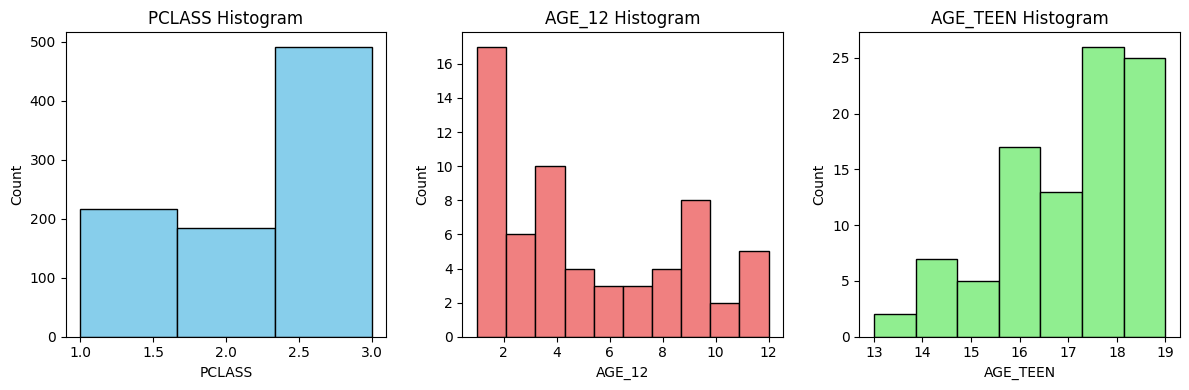

In [25]:
# Create subplots for side-by-side histograms
plt.figure(figsize=(12, 4))

# Plot histogram for 'PCLASS'
plt.subplot(1, 3, 1)
plt.hist(pasUpto19['PCLASS'], bins=3, color='skyblue', edgecolor='black')
plt.title('PCLASS Histogram')
plt.xlabel('PCLASS')
plt.ylabel('Count')

# Plot histogram for 'AGE_12'
plt.subplot(1, 3, 2)
plt.hist(pasUpto19['AGE_12'], bins=10, color='lightcoral', edgecolor='black')
plt.title('AGE_12 Histogram')
plt.xlabel('AGE_12')
plt.ylabel('Count')

# Plot histogram for 'AGE_TEEN'
plt.subplot(1, 3, 3)
plt.hist(pasUpto19['AGE_TEEN'], bins=7, color='lightgreen', edgecolor='black')
plt.title('AGE_TEEN Histogram')
plt.xlabel('AGE_TEEN')
plt.ylabel('Count')

plt.tight_layout()  # Adjusts subplot layout for better spacing

# Show the figure
plt.show()


Add a scatter plot for "PCLASS" vs. "AGE_12" into the first cell and "PCLASS" vs. "AGE_TEEN" into the last cell on the same figure at the second row:

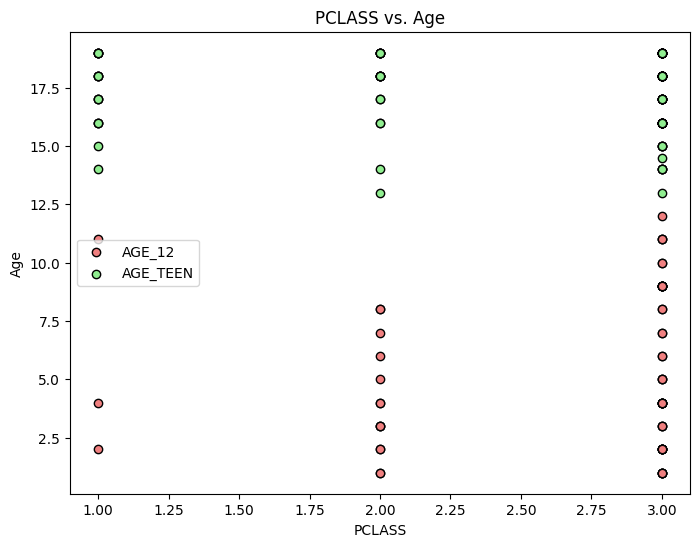

In [26]:
# Create a single subplot for both scatter plots
plt.figure(figsize=(8, 6))

# Scatter plot for 'PCLASS' vs. 'AGE_12'
plt.scatter(pasUpto19['PCLASS'], pasUpto19['AGE_12'], color='lightcoral', edgecolors='black', label='AGE_12')

# Scatter plot for 'PCLASS' vs. 'AGE_TEEN'
plt.scatter(pasUpto19['PCLASS'], pasUpto19['AGE_TEEN'], color='lightgreen', edgecolors='black', label='AGE_TEEN')

plt.title('PCLASS vs. Age')
plt.xlabel('PCLASS')
plt.ylabel('Age')
plt.legend()

# Show the figure
plt.show()

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.


*   Official Python Documentation.
*   Pandas Documentation.



